## Adhiraj Bhagawati

# Linear Regression Example

In [12]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('classic')

In [7]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


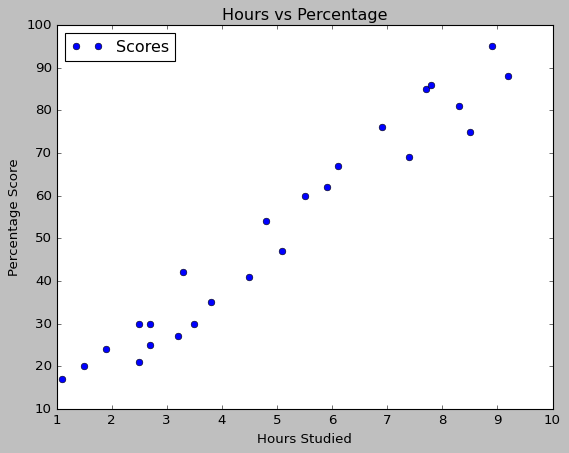

In [13]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [14]:
sns.set()

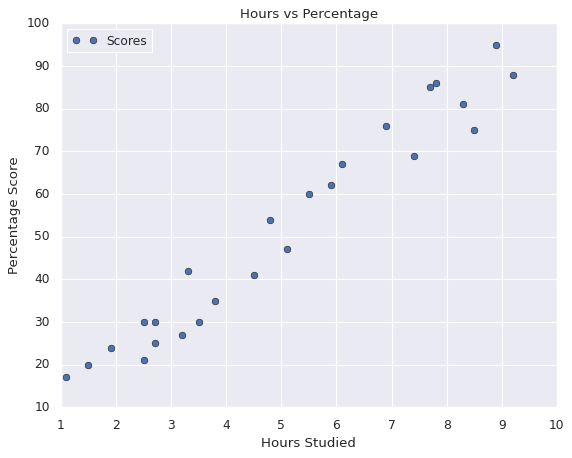

In [15]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [40]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [28]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3, random_state=0) 

In [30]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

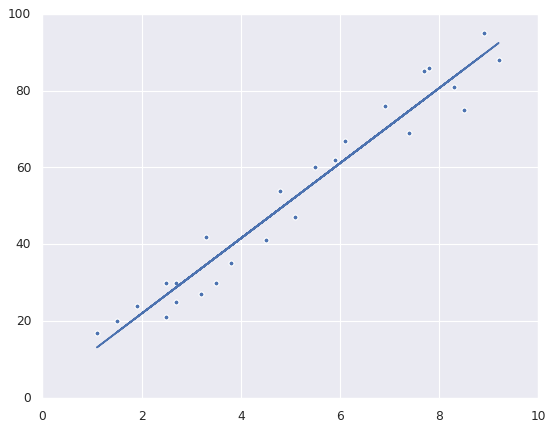

In [31]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [32]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [33]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [43]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred) )
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))

Mean Absolute Error: 4.419727808027651
Mean Squared Error: 22.965097212700428
Coefficient of determination: 0.96


## Let's try Polynomial Regression

In [48]:
X.shape

(25, 1)

In [42]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [84]:
# degree can be greater than 2

transformer = PolynomialFeatures(degree=2, include_bias=False)

In [85]:
transformer.fit(X)

PolynomialFeatures(degree=2, include_bias=False, interaction_only=False,
                   order='C')

In [86]:
x_ = transformer.transform(X)

In [87]:
print(x_)

[[ 2.5   6.25]
 [ 5.1  26.01]
 [ 3.2  10.24]
 [ 8.5  72.25]
 [ 3.5  12.25]
 [ 1.5   2.25]
 [ 9.2  84.64]
 [ 5.5  30.25]
 [ 8.3  68.89]
 [ 2.7   7.29]
 [ 7.7  59.29]
 [ 5.9  34.81]
 [ 4.5  20.25]
 [ 3.3  10.89]
 [ 1.1   1.21]
 [ 8.9  79.21]
 [ 2.5   6.25]
 [ 1.9   3.61]
 [ 6.1  37.21]
 [ 7.4  54.76]
 [ 2.7   7.29]
 [ 4.8  23.04]
 [ 3.8  14.44]
 [ 6.9  47.61]
 [ 7.8  60.84]]


In [88]:
from sklearn import linear_model
model = linear_model.PassiveAggressiveRegressor()
model.fit(x_, y)

PassiveAggressiveRegressor(C=1.0, average=False, early_stopping=False,
                           epsilon=0.1, fit_intercept=True,
                           loss='epsilon_insensitive', max_iter=1000,
                           n_iter_no_change=5, random_state=None, shuffle=True,
                           tol=0.001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [89]:

r_sq = model.score(x_, y)

print('coefficient of determination:', r_sq)

print('intercept:', model.intercept_)

print('coefficients:', model.coef_)

coefficient of determination: 0.9074219251095661
intercept: [7.53302312]
coefficients: [8.15286879 0.24612363]


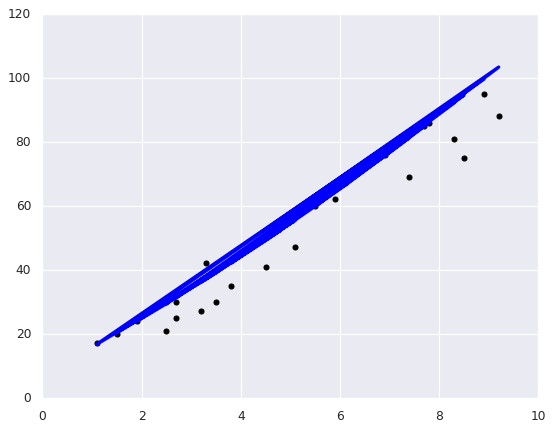

In [90]:
plt.scatter(X, y,  color='black')
plt.plot(X, model.predict(x_), color='blue', linewidth=3)

plt.show()


## This performs better than the previous model